# K-NN

> K-NN

In [ ]:
#| default_exp knn

In [ ]:
#| export
def sayhello(name): return f'Hello {name}'

## Advantages


- Easy to implement: Given the algorithm’s simplicity and accuracy, it is one of the first classifiers that a new data scientist will learn.

- Adapts easily: As new training samples are added, the algorithm adjusts to account for any new data since all training data is stored into memory.

- Few hyperparameters: KNN only requires a k value and a distance metric, which is low when compared to other machine learning algorithms.

##  Disadvantages 

- Does not scale well: Since KNN is a lazy algorithm, it takes up more memory and data storage compared to other classifiers. This can be costly from both a time and money perspective. More memory and storage will drive up business expenses and more data can take longer to compute. While different data structures, such as Ball-Tree, have been created to address the computational inefficiencies, a different classifier may be ideal depending on the business problem.

- Curse of dimensionality: The KNN algorithm tends to fall victim to the curse of dimensionality, which means that it doesn’t perform well with high-dimensional data inputs. This is sometimes also referred to as the peaking phenomenon (PDF, 340 MB) (link resides outside of ibm.com), where after the algorithm attains the optimal number of features, additional features increases the amount of classification errors, especially when the sample size is smaller.

- Prone to overfitting: Due to the “curse of dimensionality”, KNN is also more prone to overfitting. While feature selection and dimensionality reduction techniques are leveraged to prevent this from occurring, the value of k can also impact the model’s behavior. Lower values of k can overfit the data, whereas higher values of k tend to “smooth out” the prediction values since it is averaging the values over a greater area, or neighborhood. However, if the value of k is too high, then it can underfit the data. 


## Data collection

In [ ]:
!pip list | grep pandas
!pip list | grep scikit-learn

pandas                        2.0.3
scikit-learn                  1.3.0


In [ ]:
#| export
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
#| export
iris = load_iris()

In [ ]:
#| export
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
#| export
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
#| export
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#| export
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#| export
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#| export
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
#| export
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
#| export
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
#| export
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

## Data Visuals

In [ ]:
#| export
import matplotlib.pyplot as plt

<matplotlib.collections.PathCollection>

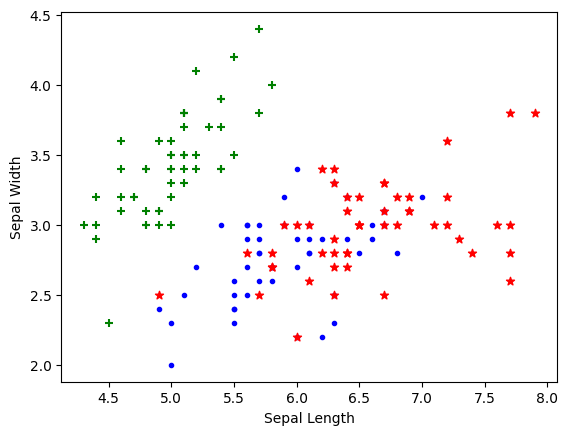

In [ ]:
#| export
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],
            df0['sepal width (cm)'],
            color="green",marker='+')

plt.scatter(df1['sepal length (cm)'],
            df1['sepal width (cm)'],
            color="blue",marker='.')

plt.scatter(df2['sepal length (cm)'],
            df2['sepal width (cm)'],
            color="red",marker='*')

<matplotlib.collections.PathCollection>

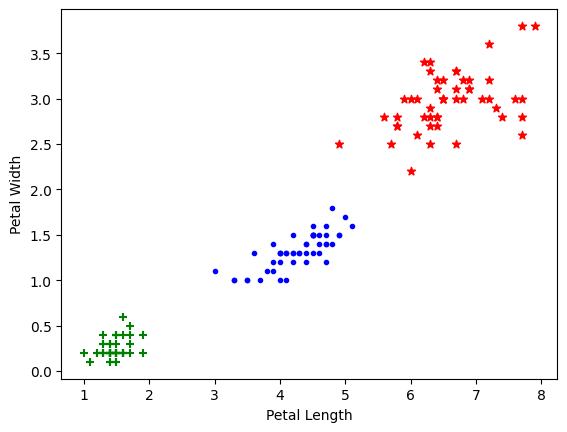

In [ ]:
#| export
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],
            df0['petal width (cm)'],
            color="green",marker='+')

plt.scatter(df1['petal length (cm)'],
            df1['petal width (cm)'],
            color="blue",marker='.')

plt.scatter(df2['sepal length (cm)'],
            df2['sepal width (cm)'],
            color="red",marker='*')

## Model Design

In [ ]:
#| export
from sklearn.model_selection import train_test_split

In [ ]:
#| export
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [ ]:
#| export
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1)

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#| export
len(X_train)

120

In [ ]:
#| export
len(X_test)

30

## First Model: K-nn 10

In [ ]:
#| export
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#| export
n_neighbors=10
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
#| export
knn.score(X_test, y_test)

1.0

In [ ]:
#| export
knn.predict([[4.8,3.0,1.5,0.3]])

array([2])

In [ ]:
#| export
from sklearn.metrics import confusion_matrix

In [ ]:
#| export
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
!pip list | grep seaborn || pip install seaborn

seaborn                       0.12.2


In [ ]:
#| export
import matplotlib.pyplot as plt
import seaborn as sn

Text(58.222222222222214, 0.5, 'Truth')

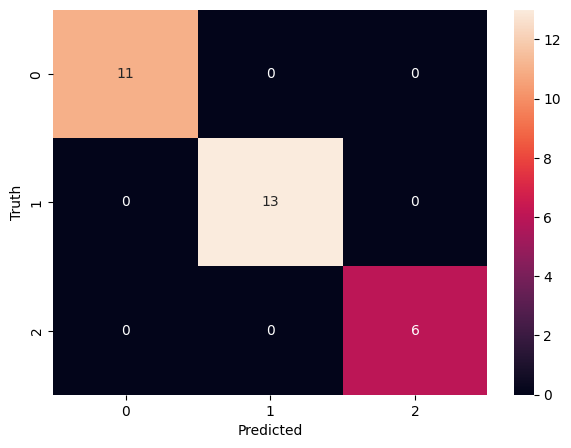

In [ ]:
#| export
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#| export
from sklearn.metrics import classification_report

In [ ]:
#| export
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np

In [ ]:
# Plot the decision regions
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Define the resolution of the grid
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x1_min, x1_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
y1_min, y1_max = X_train[:, 3].min() - 1, X_train[:, 3].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xx1, yy1 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(y1_min, y1_max, h))

In [ ]:
# Predict the class labels for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(),xx.ravel(), yy.ravel() ])
Z = Z.reshape(xx.shape)

print(f'{len(xx)} {len(yy)} {len(xx1)} {len(yy1)} ')

387 387 256 256 


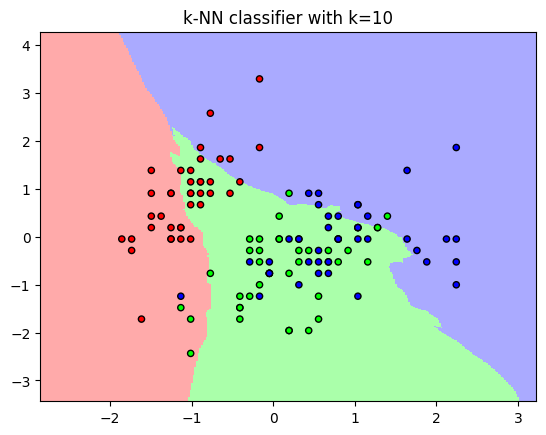

In [ ]:
# Plot the decision regions
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN classifier with k={}".format(10))


plt.show()

In [ ]:
len(xx1.ravel())

68608

Text(0.5, 1.0, 'k-NN classifier with k=10')

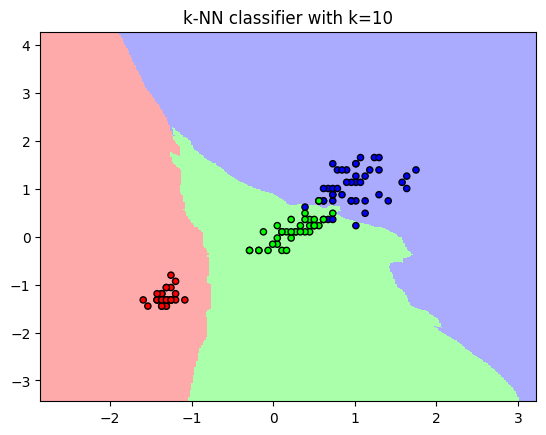

In [ ]:
# Plot the decision regions
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot the training points
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("k-NN classifier with k={}".format(10))



# KNN model with cross valication

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
knn_cv = KNeighborsClassifier(n_neighbors=10)#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.96666667 1.         1.         0.93333333 1.        ]
cv_scores mean:0.9800000000000001


## Knn model with GridSearchCV: finding optimum K

In [ ]:
from sklearn.model_selection import GridSearchCV


- create a dictionary of all values we want to test for n_neighbors

In [ ]:
knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}

- use gridsearch to test all values for n_neighbors

In [ ]:
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}